In [19]:
path="/content/train.csv"
path_test="/content/x_test.csv"

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [65]:
df=pd.read_csv(path)
df.head()

,ID,Years Lived,Sex,Yearly Earnings,Relationship Status,Dependent Count,Academic Standing,Job Title,Wellness Index,Region,...,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Client Review,Tobacco Use,Physical Activity,Asset Category,Policy Cost
0,0,26.0,Man,8071.0,Unmarried,NaN,Secondary,NaN,17.927378,City,...,0.0,4.0,622.0,2.0,2024-06-10 15:21:39.261856,NaN,Smoker,Everyday,Residence,533.0
1,1,42.0,Man,49.0,Unmarried,2.0,Undergraduate,Jobless,49.828507,City,...,1.0,15.0,568.0,6.0,2023-01-06 15:21:39.272456,Moderate,Smoker,Once a Week,Unit,4795.0
2,2,52.0,Man,80793.0,Spouse,2.0,Doctorate,Jobless,27.539608,Exurban,...,2.0,2.0,467.0,7.0,2021-03-18 15:21:39.237118,Satisfactory,Non-Smoker,Seldom,Residence,151.0
3,3,33.0,Man,30663.0,Unmarried,1.0,Undergraduate,Freelancer,24.355045,Countryside,...,1.0,10.0,710.0,2.0,2023-08-28 15:21:39.102694,Unsatisfactory,Non-Smoker,Seldom,Residence,588.0
4,4,34.0,Man,59638.0,Spouse,0.0,Undergraduate,NaN,33.394840,Countryside,...,1.0,10.0,431.0,2.0,2024-03-17 15:21:39.171102,Unsatisfactory,Smoker,Once a Month,Residence,662.0


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 813321 entries, 0 to 813320
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     813321 non-null  int64  
 1   Years Lived            800590 non-null  float64
 2   Sex                    813321 non-null  object 
 3   Yearly Earnings        782909 non-null  float64
 4   Relationship Status    800778 non-null  object 
 5   Dependent Count        738902 non-null  float64
 6   Academic Standing      813321 non-null  object 
 7   Job Title              570078 non-null  object 
 8   Wellness Index         762917 non-null  float64
 9   Region                 813321 non-null  object 
 10  Coverage Class         813321 non-null  object 
 11  Prior Claims           566631 non-null  float64
 12  Automobile Age         813317 non-null  float64
 13  Financial Rating       719813 non-null  float64
 14  Coverage Period        813320 non-nu

In [5]:
df.isna().sum()

,0
ID,0
Years Lived,12731
Sex,0
Yearly Earnings,30412
Relationship Status,12543
Dependent Count,74419
Academic Standing,0
Job Title,243243
Wellness Index,50404
Region,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [66]:
# Replacing missing values with respective values

# Here this are numeric values in a range, so using mean
df['Years Lived']=df['Years Lived'].fillna(df['Years Lived'].mean())
df['Yearly Earnings']=df['Yearly Earnings'].fillna(df['Yearly Earnings'].mean())
df['Wellness Index']=df['Wellness Index'].fillna(df['Wellness Index'].mean())
df['Financial Rating']=df['Financial Rating'].fillna(df['Financial Rating'].mean())

# Here this values are limited(3-5 unique values)
df['Relationship Status']=df['Relationship Status'].fillna(df['Relationship Status'].mode()[0])
df['Dependent Count']=df['Dependent Count'].fillna(df['Dependent Count'].mode()[0])
df['Prior Claims']=df['Prior Claims'].fillna(df['Prior Claims'].mode()[0])
df['Client Review']=df['Client Review'].fillna(df['Client Review'].mode()[0])

# Dropping beacuse na values are very less
df.dropna(inplace=True)

In [67]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,771452.0,550325.908390,317609.957433,1.000000,275325.750000,550446.000000,825549.250000,1.099998e+06
Years Lived,771452.0,41.154347,13.431859,18.000000,30.000000,41.143964,53.000000,6.400000e+01
Yearly Earnings,771452.0,32826.336455,31689.339863,2.000000,8516.000000,24997.000000,43973.000000,1.499970e+05
Dependent Count,771452.0,2.098723,1.380374,0.000000,1.000000,2.000000,3.000000,4.000000e+00
Wellness Index,771452.0,25.619909,11.831039,2.024415,16.539346,25.613571,33.791722,5.897591e+01
Prior Claims,771452.0,0.701227,0.943872,0.000000,0.000000,0.000000,1.000000,8.000000e+00
Automobile Age,771452.0,9.579350,5.774139,0.000000,5.000000,10.000000,15.000000,1.900000e+01
Financial Rating,771452.0,592.404059,141.162516,300.000000,483.000000,593.003554,705.000000,8.490000e+02
Coverage Period,771452.0,5.017280,2.595367,1.000000,3.000000,5.000000,7.000000,9.000000e+00
Policy Cost,771452.0,1106.520706,867.107090,20.000000,515.000000,876.000000,1515.000000,4.997000e+03


## Data Visualization

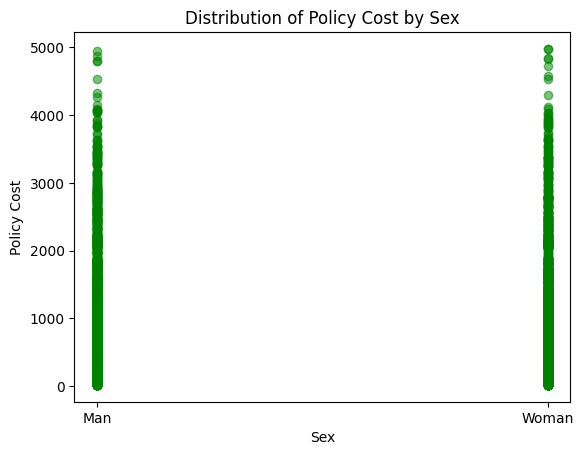

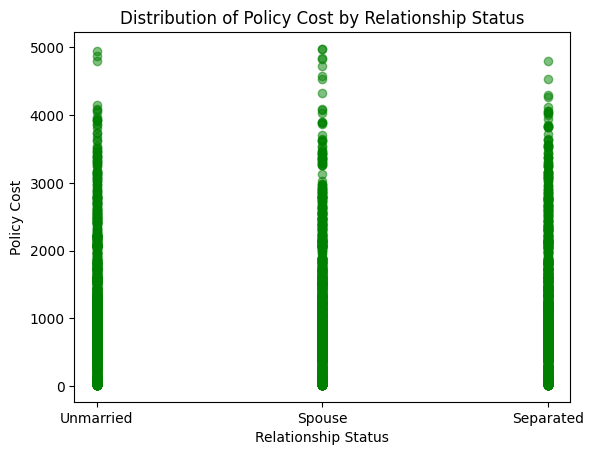

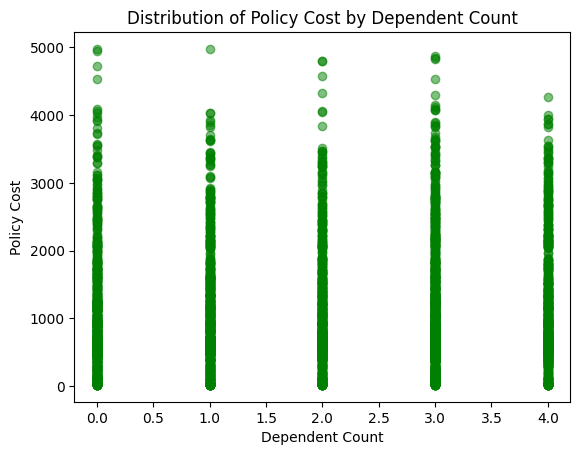

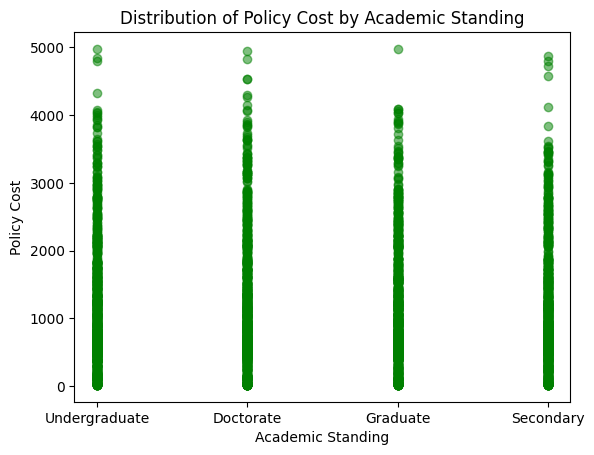

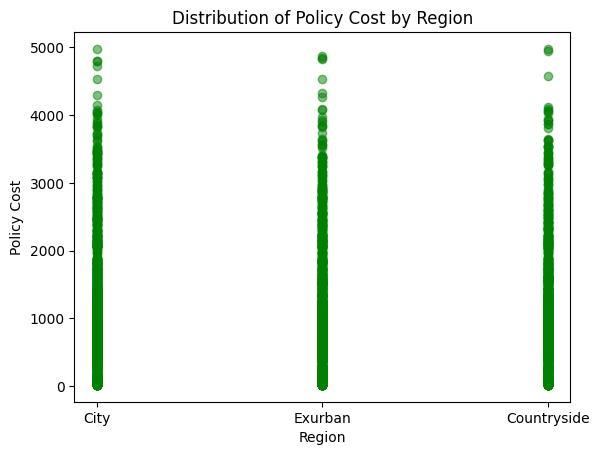

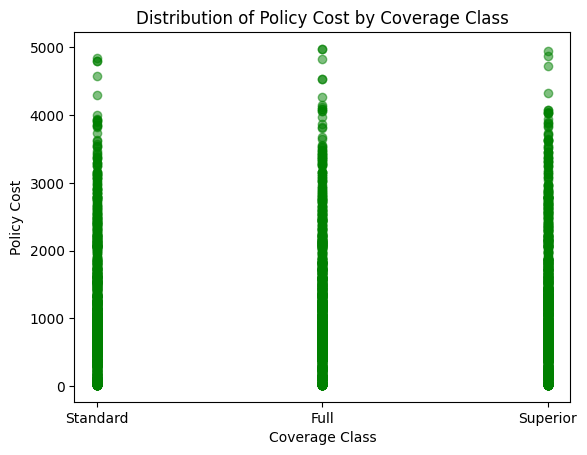

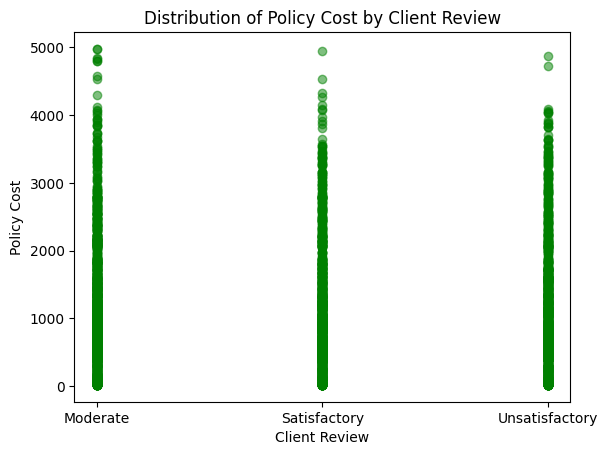

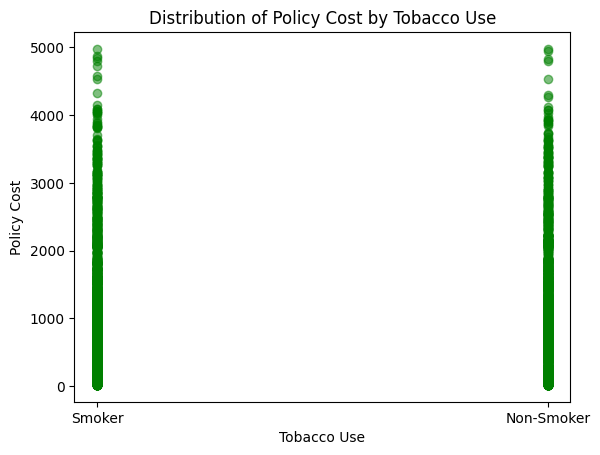

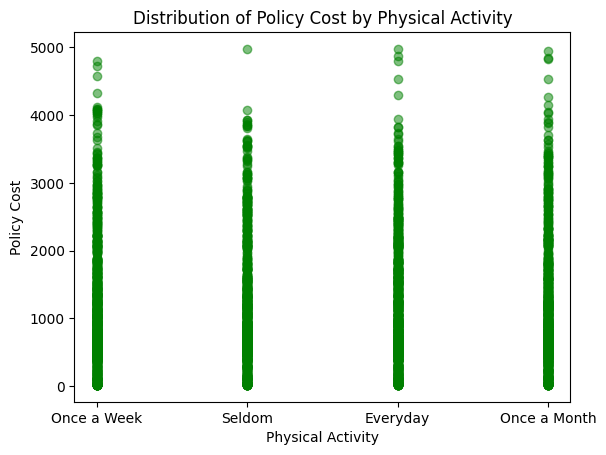

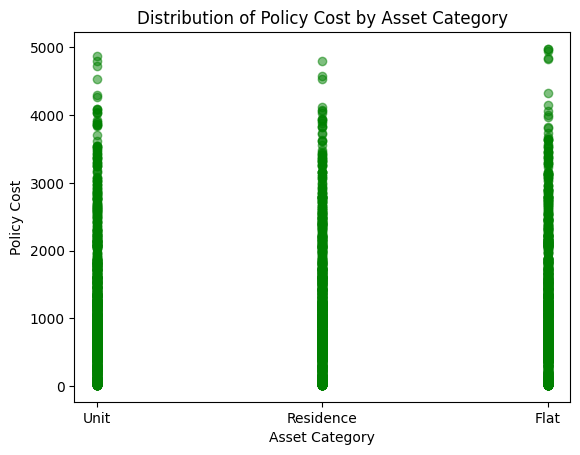

In [75]:
cols=['Sex','Relationship Status','Dependent Count','Academic Standing','Region','Coverage Class','Client Review','Tobacco Use','Physical Activity','Asset Category']
for c in cols:
  plt.scatter(df[c][:4000],df['Policy Cost'][:4000],color='green',alpha=0.5)
  plt.xlabel(c)
  plt.ylabel('Policy Cost')
  plt.title(f'Distribution of Policy Cost by {c}')
  plt.show()

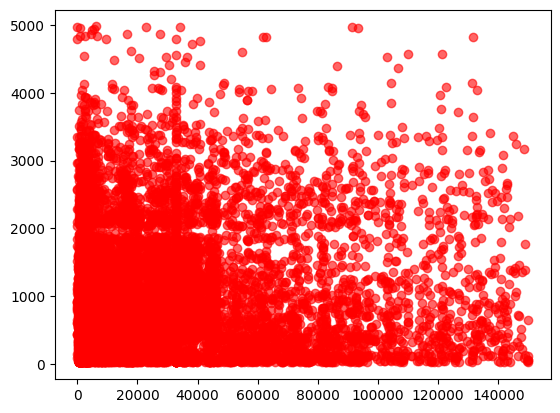

In [80]:
plt.scatter(df['Yearly Earnings'][:10000],df['Policy Cost'][:10000],color='red',alpha=0.6)
plt.show()

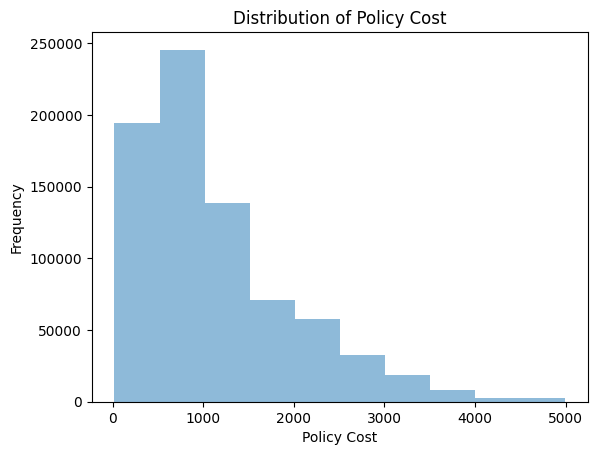

In [74]:
plt.hist(df['Policy Cost'],alpha=0.5)
plt.xlabel('Policy Cost')
plt.ylabel('Frequency')
plt.title('Distribution of Policy Cost')
plt.show()

## StandScaler

In [81]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()

In [82]:
df['Yearly Earnings']=mms.fit_transform(df[['Yearly Earnings']])
df['Financial Rating']=mms.fit_transform(df[['Financial Rating']])

## Encoding

In [83]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [84]:
def labelencoder(df, columns):
    le = LabelEncoder()
    for col in columns:
        df[col] = le.fit_transform(df[col])
    return df
columns = ['Sex','Relationship Status','Academic Standing','Region',
           'Coverage Class','Client Review','Tobacco Use',
           'Physical Activity','Asset Category']
df = labelencoder(df, columns)

## Model Training

In [106]:
X=df.drop(['ID','Job Title','Coverage Commencement','Policy Cost'],axis=1)
y=df['Policy Cost']

In [107]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [108]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)

GradientBoostingRegressor()

In [89]:
from sklearn.metrics import r2_score

In [109]:
y_pred=gbr.predict(X_test)
r2_score(y_test,y_pred)

0.02328322875278266

## Test Dataset

In [91]:
test=pd.read_csv(path_test)
test.head()

,ID,Years Lived,Sex,Yearly Earnings,Relationship Status,Dependent Count,Academic Standing,Job Title,Wellness Index,Region,Coverage Class,Prior Claims,Automobile Age,Financial Rating,Coverage Period,Coverage Commencement,Client Review,Tobacco Use,Physical Activity,Asset Category
0,0,52.0,Woman,5538.0,Spouse,NaN,Graduate,Working,8.093145,Countryside,Standard,0.0,18.0,497.0,3.0,2020-02-10 15:21:39.274993,Moderate,Non-Smoker,Once a Week,Flat
1,1,60.0,Woman,39711.0,Spouse,4.0,Undergraduate,Working,NaN,Exurban,Full,0.0,3.0,340.0,3.0,2020-10-16 15:21:39.097737,Unsatisfactory,Non-Smoker,Once a Week,Flat
2,2,58.0,Woman,2364.0,Spouse,2.0,Undergraduate,NaN,34.452482,City,Full,2.0,19.0,NaN,7.0,2021-01-02 15:21:39.126661,Unsatisfactory,Non-Smoker,Once a Month,Residence
3,3,39.0,Man,9094.0,Separated,0.0,Undergraduate,NaN,26.241661,Countryside,Standard,1.0,17.0,761.0,5.0,2022-05-11 15:21:39.134960,Unsatisfactory,Smoker,Seldom,Unit
4,4,47.0,Man,43189.0,Separated,NaN,Doctorate,NaN,26.691921,Exurban,Full,1.0,4.0,319.0,4.0,2020-07-28 15:21:39.181605,Unsatisfactory,Smoker,Once a Week,Flat


In [100]:
df_test=test.drop(['ID','Job Title','Coverage Commencement'],axis=1)

In [101]:
df_test.isna().sum()

,0
Years Lived,1486
Sex,0
Yearly Earnings,3798
Relationship Status,1547
Dependent Count,8969
Academic Standing,0
Wellness Index,6030
Region,0
Coverage Class,0
Prior Claims,30169


In [102]:
df_test['Years Lived']=df_test['Years Lived'].fillna(df_test['Years Lived'].mean())
df_test['Yearly Earnings']=df_test['Yearly Earnings'].fillna(df_test['Yearly Earnings'].mean())
df_test['Wellness Index']=df_test['Wellness Index'].fillna(df_test['Wellness Index'].mean())
df_test['Financial Rating']=df_test['Financial Rating'].fillna(df_test['Financial Rating'].mean())

# Here this values are limited(3-5 unique values)
df_test['Relationship Status']=df_test['Relationship Status'].fillna(df_test['Relationship Status'].mode()[0])
df_test['Dependent Count']=df_test['Dependent Count'].fillna(df_test['Dependent Count'].mode()[0])
df_test['Prior Claims']=df_test['Prior Claims'].fillna(df_test['Prior Claims'].mode()[0])
df_test['Client Review']=df_test['Client Review'].fillna(df_test['Client Review'].mode()[0])

In [110]:
df_test=labelencoder(df_test, columns)

In [111]:
y_pred_test=gbr.predict(df_test)

In [113]:
submission=pd.DataFrame({'ID':test['ID'],'Policy Cost':y_pred_test})
submission.to_csv('submission.csv',index=False)